# **ARTIFICIAL NEURAL NETWORKS**

In [1]:
import pandas
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
from google.colab import files
uploaded= files.upload()

Saving Alphabets_data.csv to Alphabets_data.csv


In [3]:
dataset = pandas.read_csv("Alphabets_data.csv")

In [4]:
dataset.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
# shape
print(dataset.shape)

(20000, 17)


In [6]:
# Generate various summary statistics
print(dataset.describe())

               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [8]:
# class distribution
print(dataset.groupby('letter').size())

letter
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64


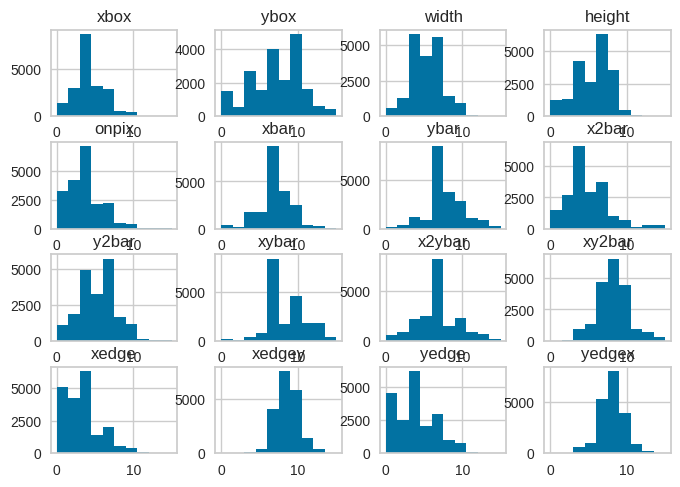

In [9]:
# histograms
dataset.hist()
plt.show()

In [10]:
array = dataset.values

In [11]:
X = array[:, 1:17]
Y = array[:, 0]

In [12]:
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', Y.shape)

X matrix dimensionality: (20000, 16)
Y vector dimensionality: (20000,)


In [13]:
# split the data into a training set and a test set
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                                random_state=10, stratify=Y)

In [14]:
print("X_train: ", X_train.shape)
print("X_validation: ", X_validation.shape)
print("Y_train: ", Y_train.shape)
print("Y_validation: ", Y_validation.shape)

X_train:  (16000, 16)
X_validation:  (4000, 16)
Y_train:  (16000,)
Y_validation:  (4000,)


In [15]:
dec_tree = DecisionTreeClassifier()

In [16]:
cm = ConfusionMatrix(dec_tree, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


0.874

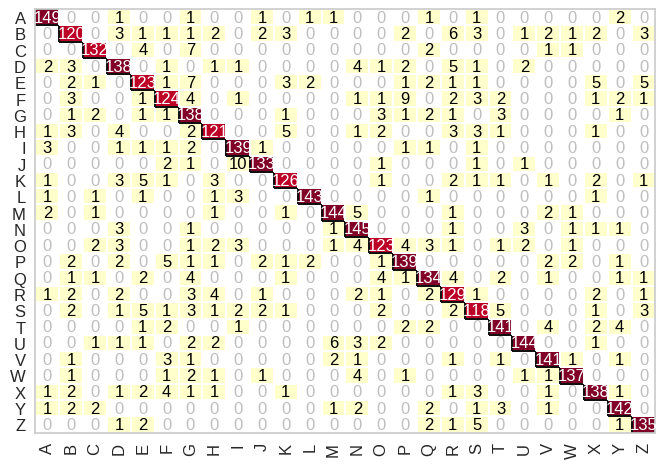

In [17]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [18]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [19]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.874


In [20]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[149   0   0   1   0   0   1   0   0   1   0   1   1   0   0   0   1   0
    1   0   0   0   0   0   2   0]
 [  0 120   0   3   1   1   1   2   0   2   3   0   0   0   0   2   0   6
    3   0   1   2   1   2   0   3]
 [  0   0 132   0   4   0   7   0   0   0   0   0   0   0   0   0   2   0
    0   0   0   1   1   0   0   0]
 [  2   3   0 138   0   1   0   1   1   0   0   0   0   4   1   2   0   5
    1   0   2   0   0   0   0   0]
 [  0   2   1   0 123   1   7   0   0   0   3   2   0   0   0   1   2   1
    1   0   0   0   0   5   0   5]
 [  0   3   0   0   1 124   4   0   1   0   0   0   0   1   1   9   0   2
    3   2   0   0   0   1   2   1]
 [  0   1   2   0   1   1 138   0   0   0   1   0   0   0   3   1   2   1
    0   3   0   0   0   0   1   0]
 [  1   3   0   4   0   0   2 121   0   0   5   0   0   1   2   0   0   3
    3   1   0   0   0   1   0   0]
 [  3   0   0   1   1   1   2   0 139   1   0   0   0   0   0   1   1   0
    1   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [21]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.91975   0.94304   0.93125       158
           B    0.82759   0.78431   0.80537       153
           C    0.92308   0.89796   0.91034       147
           D    0.84146   0.85714   0.84923       161
           E    0.82000   0.79870   0.80921       154
           F    0.83784   0.80000   0.81848       155
           G    0.75824   0.89032   0.81899       155
           H    0.85816   0.82313   0.84028       147
           I    0.86875   0.92053   0.89389       151
           J    0.93007   0.89262   0.91096       149
           K    0.88112   0.85135   0.86598       148
           L    0.96622   0.94079   0.95333       152
           M    0.92308   0.91139   0.91720       158
           N    0.84302   0.92357   0.88146       157
           O    0.86620   0.81457   0.83959       151
           P    0.85276   0.86335   0.85802       161
           Q    0.87013   0.85350   0.86174       157
           R    0.80124   0

In [22]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [23]:
from sklearn.naive_bayes import GaussianNB

# **GaussianNB**

In [24]:
gaussianNB = GaussianNB()


In [25]:
cm = ConfusionMatrix(gaussianNB, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.64175

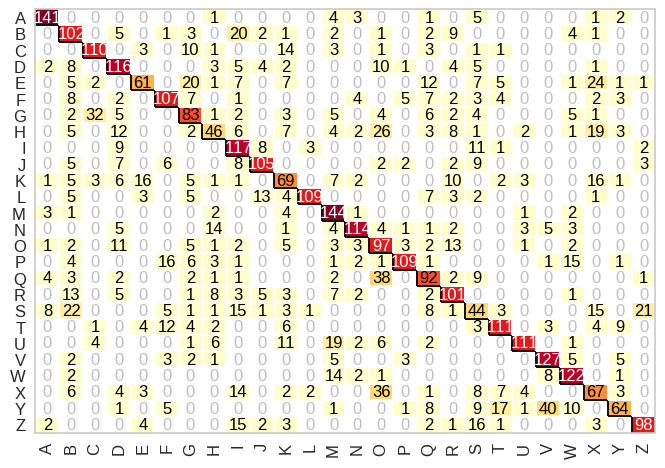

In [26]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [27]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [28]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.64175


In [29]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[141   0   0   0   0   0   0   1   0   0   0   0   4   3   0   0   1   0
    5   0   0   0   0   1   2   0]
 [  0 102   0   5   0   1   3   0  20   2   1   0   2   0   1   0   2   9
    0   0   0   0   4   1   0   0]
 [  0   0 110   0   3   0  10   1   0   0  14   0   3   0   1   0   3   0
    1   1   0   0   0   0   0   0]
 [  2   8   0 116   0   0   0   3   5   4   2   0   0   0  10   1   0   4
    5   0   0   0   0   1   0   0]
 [  0   5   2   0  61   0  20   1   7   0   7   0   0   0   0   0  12   0
    7   5   0   0   1  24   1   1]
 [  0   8   0   2   0 107   7   0   1   0   0   0   0   4   0   5   7   2
    3   4   0   0   0   2   3   0]
 [  0   2  32   5   0   0  83   1   2   0   3   0   5   0   4   0   6   2
    4   0   0   0   5   1   0   0]
 [  0   5   0  12   0   0   2  46   6   0   7   0   4   2  26   0   3   8
    1   0   2   0   1  19   3   0]
 [  0   0   0   9   0   0   0   0 117   8   0   3   0   0   0   0   0   0
   11   1   0   0   0   0   0   2]
 [  0   5   0   7  

In [30]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.87037   0.89241   0.88125       158
           B    0.51000   0.66667   0.57790       153
           C    0.72368   0.74830   0.73579       147
           D    0.61053   0.72050   0.66097       161
           E    0.64894   0.39610   0.49194       154
           F    0.69032   0.69032   0.69032       155
           G    0.52866   0.53548   0.53205       155
           H    0.49462   0.31293   0.38333       147
           I    0.53670   0.77483   0.63415       151
           J    0.75000   0.70470   0.72664       149
           K    0.47586   0.46622   0.47099       148
           L    0.94783   0.71711   0.81648       152
           M    0.64000   0.91139   0.75196       158
           N    0.83212   0.72611   0.77551       157
           O    0.42731   0.64238   0.51323       151
           P    0.87200   0.67702   0.76224       161
           Q    0.57500   0.58599   0.58044       157
           R    0.63125   0

In [31]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

# **KNN Classifier**

In [32]:
from sklearn.neighbors import KNeighborsClassifier


In [33]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)


In [34]:
cm = ConfusionMatrix(knn, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


0.966

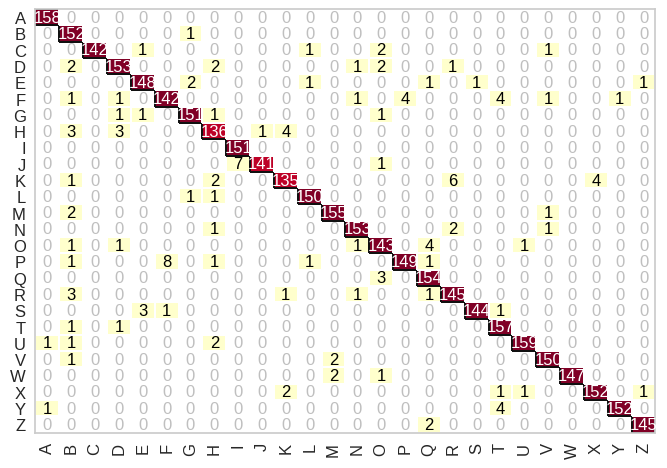

In [35]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)


In [36]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [37]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.966


In [38]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 152   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 142   0   1   0   0   0   0   0   0   1   0   0   2   0   0   0
    0   0   0   1   0   0   0   0]
 [  0   2   0 153   0   0   0   2   0   0   0   0   0   1   2   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 148   0   2   0   0   0   0   1   0   0   0   0   1   0
    1   0   0   0   0   0   0   1]
 [  0   1   0   1   0 142   0   0   0   0   0   0   0   1   0   4   0   0
    0   4   0   1   0   0   1   0]
 [  0   0   0   1   1   0 151   1   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   0   3   0   0   0 136   0   1   4   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [39]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.98750   1.00000   0.99371       158
           B    0.89941   0.99346   0.94410       153
           C    1.00000   0.96599   0.98270       147
           D    0.95625   0.95031   0.95327       161
           E    0.96732   0.96104   0.96417       154
           F    0.94040   0.91613   0.92810       155
           G    0.97419   0.97419   0.97419       155
           H    0.93151   0.92517   0.92833       147
           I    0.95570   1.00000   0.97735       151
           J    0.99296   0.94631   0.96907       149
           K    0.95070   0.91216   0.93103       148
           L    0.98039   0.98684   0.98361       152
           M    0.97484   0.98101   0.97792       158
           N    0.97452   0.97452   0.97452       157
           O    0.93464   0.94702   0.94079       151
           P    0.97386   0.92547   0.94904       161
           Q    0.94479   0.98089   0.96250       157
           R    0.94156   0

In [40]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

# **SVC**

In [42]:
from sklearn.svm import SVC

In [43]:
svc = SVC(kernel='rbf', gamma='auto', C=6)


In [44]:
cm = ConfusionMatrix(svc, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


0.978

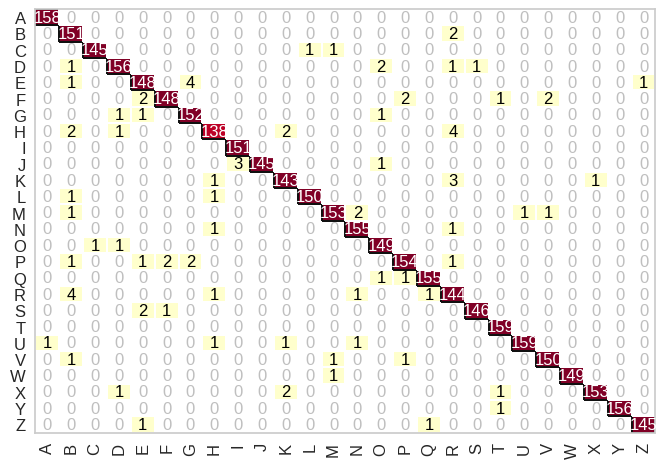

In [45]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [46]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [47]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.978


In [48]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 151   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 145   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 156   0   0   0   0   0   0   0   0   0   0   2   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   1   0   0 148   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   2 148   0   0   0   0   0   0   0   0   0   2   0   0
    0   1   0   2   0   0   0   0]
 [  0   0   0   1   1   0 152   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   1   0   0   0 138   0   0   2   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [49]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.99371   1.00000   0.99685       158
           B    0.92638   0.98693   0.95570       153
           C    0.99315   0.98639   0.98976       147
           D    0.97500   0.96894   0.97196       161
           E    0.95484   0.96104   0.95793       154
           F    0.98013   0.95484   0.96732       155
           G    0.96203   0.98065   0.97125       155
           H    0.96503   0.93878   0.95172       147
           I    0.98052   1.00000   0.99016       151
           J    1.00000   0.97315   0.98639       149
           K    0.96622   0.96622   0.96622       148
           L    0.99338   0.98684   0.99010       152
           M    0.98077   0.96835   0.97452       158
           N    0.97484   0.98726   0.98101       157
           O    0.96753   0.98675   0.97705       151
           P    0.97468   0.95652   0.96552       161
           Q    0.98726   0.98726   0.98726       157
           R    0.92308   0

In [50]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

# **ANN**

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)


In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='logistic')


In [58]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


0.96875

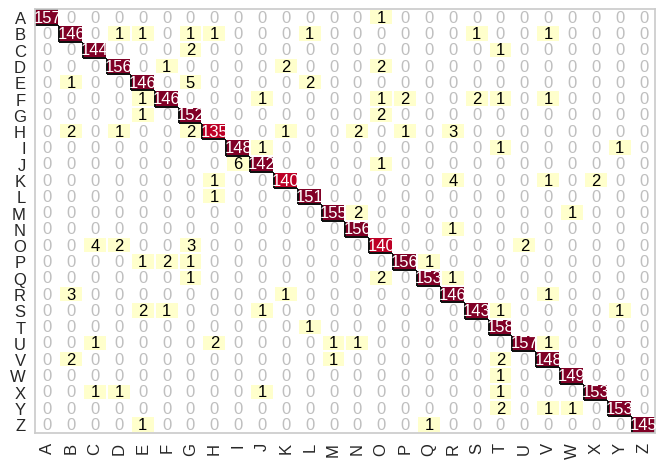

In [61]:
# train the model using the training sets
cm.fit(X_train, Y_train)
cm.score(X_validation, Y_validation)

In [62]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.978


In [63]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 151   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 145   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 156   0   0   0   0   0   0   0   0   0   0   2   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   1   0   0 148   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   2 148   0   0   0   0   0   0   0   0   0   2   0   0
    0   1   0   2   0   0   0   0]
 [  0   0   0   1   1   0 152   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   1   0   0   0 138   0   0   2   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [64]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.99371   1.00000   0.99685       158
           B    0.92638   0.98693   0.95570       153
           C    0.99315   0.98639   0.98976       147
           D    0.97500   0.96894   0.97196       161
           E    0.95484   0.96104   0.95793       154
           F    0.98013   0.95484   0.96732       155
           G    0.96203   0.98065   0.97125       155
           H    0.96503   0.93878   0.95172       147
           I    0.98052   1.00000   0.99016       151
           J    1.00000   0.97315   0.98639       149
           K    0.96622   0.96622   0.96622       148
           L    0.99338   0.98684   0.99010       152
           M    0.98077   0.96835   0.97452       158
           N    0.97484   0.98726   0.98101       157
           O    0.96753   0.98675   0.97705       151
           P    0.97468   0.95652   0.96552       161
           Q    0.98726   0.98726   0.98726       157
           R    0.92308   0

In [65]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [66]:
#End of Program.